# Assignment 3

## The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. construct a model with Logistic Regression that uses available data about the passengers to predict their survival.

## Variable	
#### survival:Survival 	                                      (0 = No, 1 = Yes)
#### pclass:      Ticket class 	                                  1 = 1st, 2 = 2nd, 3 = 3rd
#### sex: 	    Sex 	
#### Age: 	    Age in years 	
#### sibsp: 	    # of siblings / spouses aboard the Titanic 	
#### parch: 	    # of parents / children aboard the Titanic 	
#### ticket: 	    Ticket number 	
#### fare: 	    Passenger fare 	
#### cabin: 	    Cabin number 	
#### embarked: 	Port of Embarkation 	                           (C = Cherbourg, Q = Queenstown, S = Southampton)

# I shall solve the problems in the following manner

## 1) Data cleaning and EDA (solving 1st and 2nd questions of assignment)
## 2) Data engineering(solving the 3rd part)
## 3) Building models(solving the 4rth,5th,6th  question of the assignment)
## 4) Best model


### importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 1) Data cleaning and EDA(solving 1st and 2nd questions of assignment)



In [2]:
train = pd.read_csv('titanic_dataset.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We'll start by checking out missing data!We can use seaborn to create a simple heatmap to see where we are missing data

In [5]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


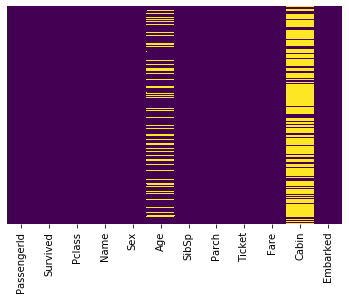

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"



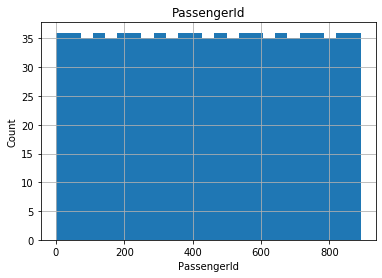

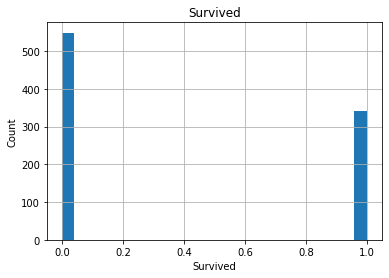

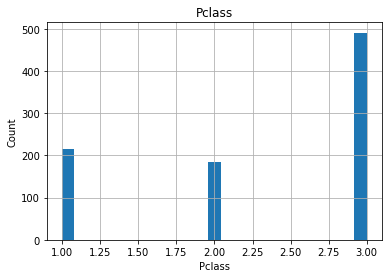

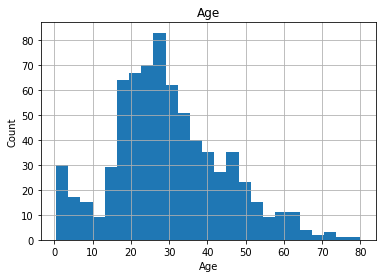

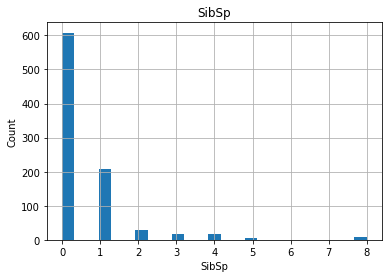

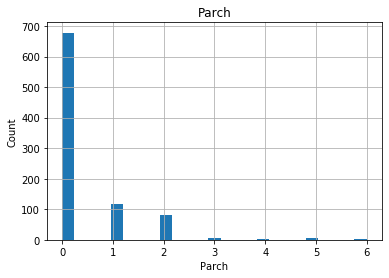

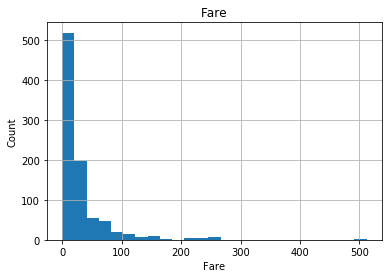

In [7]:
numerical_features = [feature for feature in train.columns if train[feature].dtypes != 'O']
for feature in numerical_features:
    
    data=train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

Here we know that parch , fare , passenger id are mostly unique values so they arent normaly distributed. The age feature is mostly normally distributed. since we are prediciting the probability of the survial, the data is good to go ahead.


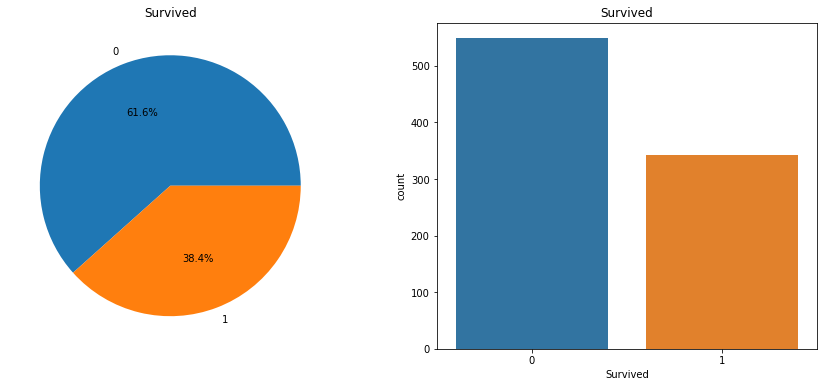

In [8]:
def piecount(col):
    f, ax = plt.subplots(1, 2, figsize=(15, 6))
    train[col].value_counts().plot.pie( autopct='%1.1f%%', ax=ax[0], shadow=False)
    ax[0].set_title(col)
    ax[0].set_ylabel('')
    sns.countplot(col, data=train, ax=ax[1])
    ax[1].set_title(col)
    plt.show()

piecount('Survived')



since the people who survived and did not survive are in a 60-40 ratio it is a balanced dataset.

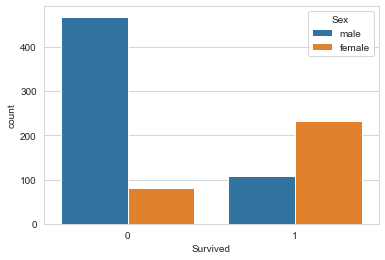

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)

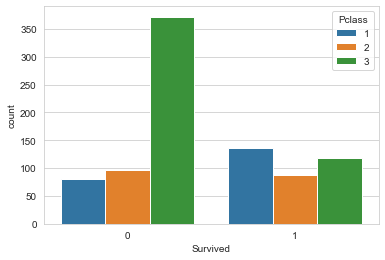

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train)

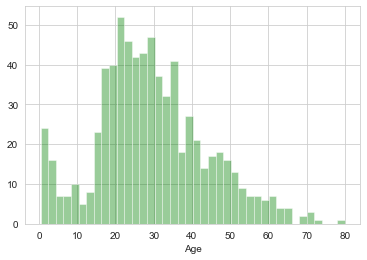

In [11]:
sns.distplot(train['Age'].dropna(),kde=False,color='green',bins=40)

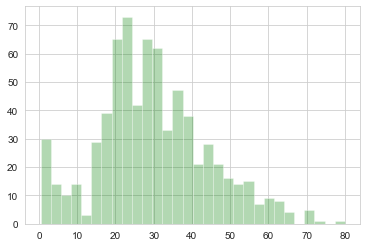

In [12]:
train['Age'].hist(color='green',bins=30,alpha=0.3)

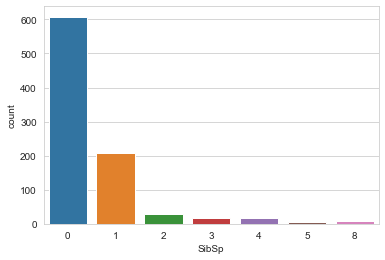

In [13]:
sns.countplot(x='SibSp',data=train)

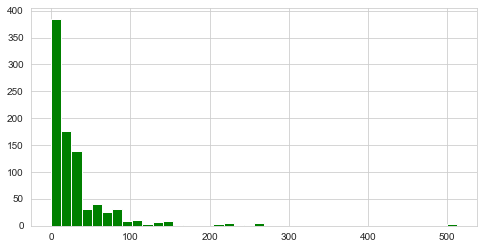

In [14]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


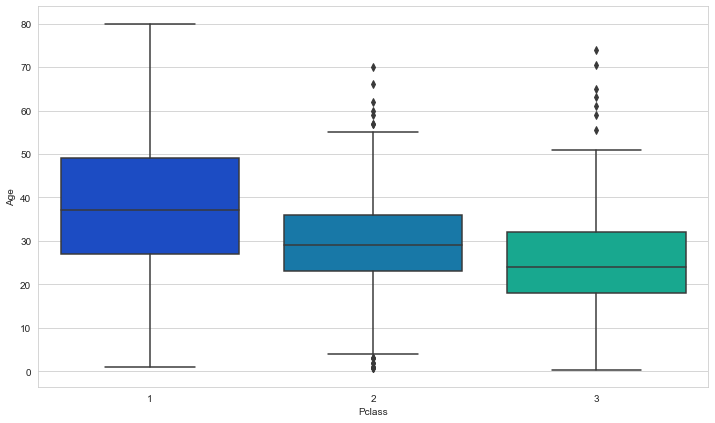

In [15]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

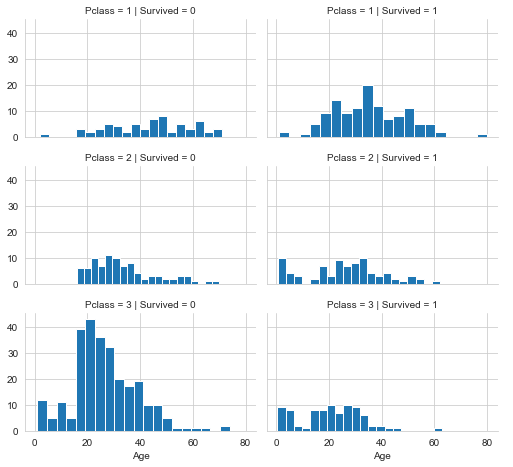

In [16]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=1, bins=20)
grid.add_legend();

In [17]:
train.groupby('Pclass', as_index=False)['Age'].median()

,Pclass,Age
0,1,37.0
1,2,29.0
2,3,24.0


In [18]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [19]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

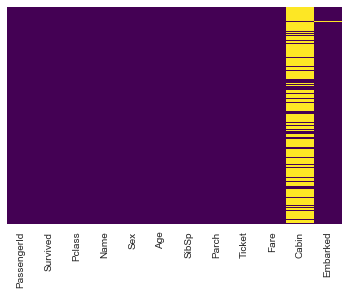

In [20]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Let's drop the Cabin column and the row in Embarked that is NaN, we do this because there are too many NaN values 

In [21]:
train.drop('Cabin',axis=1,inplace=True)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
train.dropna(inplace=True)

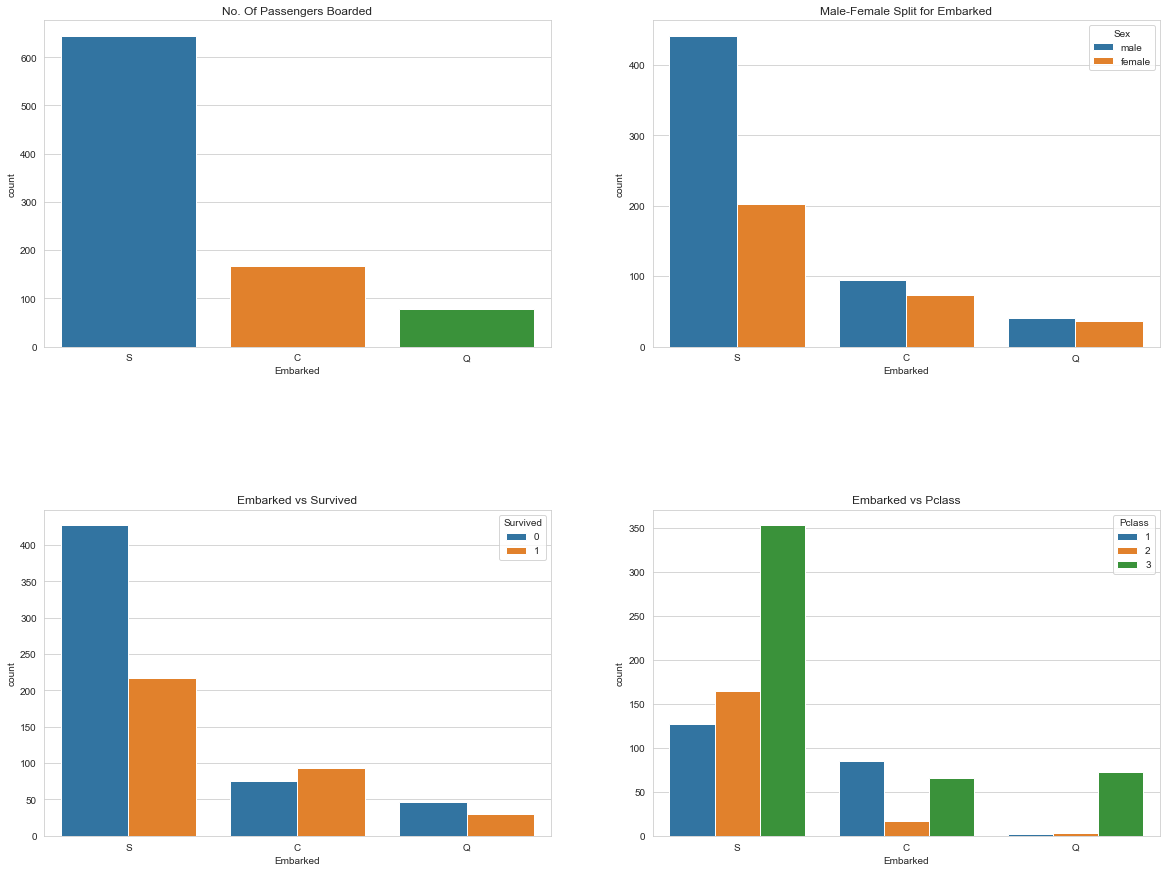

In [24]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked', data=train, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=train, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=train, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=train, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

OBSEVATION :

1) Maximum boarding in S. The majority is Pclass3

2) Passengers of C survived a large proportion. The reason would be due to the large number of Pclass1 and Pclass2 passengers

3) Embark S is the port where most rich people board, but it is unlikely to survive. Lots of passengers in Pclass3.

4) Port Q has almost 95% of passengers Pclass3

# 2) Data engineering(solving the 3rd part)

### Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 123.3+ KB


In [26]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [27]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [28]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [29]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [30]:
train = pd.concat([train,sex,embark],axis=1)

In [31]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


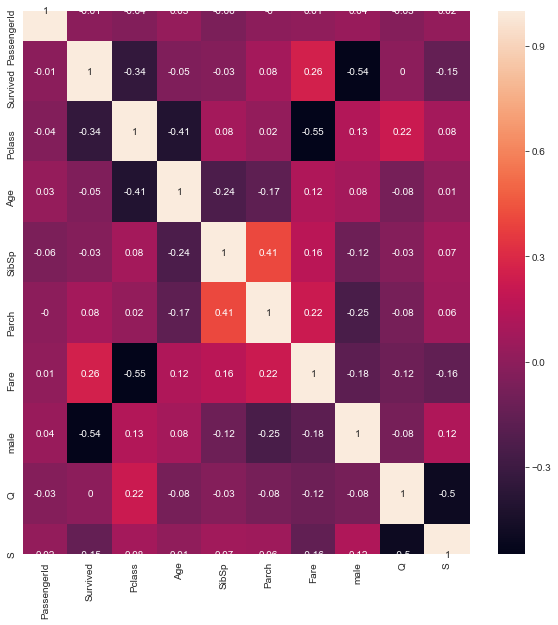

In [32]:
def Show_HeatMap(x):
    f,ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(x.corr().round(2),annot=True,ax=ax);
Show_HeatMap(train)    

In [33]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,1.000000,-0.005028,-0.035330,0.033008,-0.057686,-0.001657,0.012703,0.043136,-0.033694,0.022269
Survived,-0.005028,1.000000,-0.335549,-0.052051,-0.034040,0.083151,0.255290,-0.541585,0.004536,-0.151777
Pclass,-0.035330,-0.335549,1.000000,-0.405549,0.081656,0.016824,-0.548193,0.127741,0.220558,0.076466
Age,0.033008,-0.052051,-0.405549,1.000000,-0.242807,-0.170089,0.120938,0.083730,-0.080875,0.013598
SibSp,-0.057686,-0.034040,0.081656,-0.242807,1.000000,0.414542,0.160887,-0.116348,-0.026692,0.069438
Parch,-0.001657,0.083151,0.016824,-0.170089,0.414542,1.000000,0.217532,-0.247508,-0.081585,0.061512
Fare,0.012703,0.255290,-0.548193,0.120938,0.160887,0.217532,1.000000,-0.179958,-0.116684,-0.163758
male,0.043136,-0.541585,0.127741,0.083730,-0.116348,-0.247508,-0.179958,1.000000,-0.075217,0.121405
Q,-0.033694,0.004536,0.220558,-0.080875,-0.026692,-0.081585,-0.116684,-0.075217,1.000000,-0.499261
S,0.022269,-0.151777,0.076466,0.013598,0.069438,0.061512,-0.163758,0.121405,-0.499261,1.000000


## Train Test Split

In [34]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [35]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [38]:
import statsmodels.api as sm
X1 = sm.add_constant(x_train)
X2 = sm.add_constant(x_test)

# 3) Building models(solving the 4rth,5th,6th  question of the assignment)

### 3.1)solving with logistic regression by using stats 

In [39]:
logit1 = sm.GLM(y_train, X1)
result = logit1.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  622
Model:                            GLM   Df Residuals:                      612
Model Family:                Gaussian   Df Model:                            9
Link Function:               identity   Scale:                         0.14684
Method:                          IRLS   Log-Likelihood:                -280.92
Date:                Sat, 20 Jun 2020   Deviance:                       89.867
Time:                        20:51:05   Pearson chi2:                     89.9
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.3299      0.096     13.877      

In [40]:
print(result.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            581.8343  
Link Function:      identity         BIC:            -3847.0921
Dependent Variable: Survived         Log-Likelihood: -280.92   
Date:               2020-06-20 20:51 LL-Null:        -473.65   
No. Observations:   622              Deviance:       89.867    
Df Model:           9                Pearson chi2:   89.9      
Df Residuals:       612              Scale:          0.14684   
Method:             IRLS                                       
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const           1.3299   0.0958  13.8770 0.0000  1.1420  1.5177
PassengerId     0.0000   0.0001   0.4009 0.6885 -0.0001  0.0001
Pclass         -0.1769   0.0249  -7.1171 0.0000 -0.2256 -0.1282
Age            -0.0060   0.0014  -4.4319 0.0000 -0.0087

Here the most important accuracy parameters of the model are AIC and Deviance. AIC represents the value of the model when compared to similar models with subsets the same data, lower the AIC better the model. Devaiance measures the goodness of the fit of the model, lower the deviance the more accurate the model is.

Ho = there is no strong relation bewteen the parameters

Ha= there is a strong relation between the parameters 

since the confindence value is greater  than normal standard or the pvalue is lower than the significance value (5%) hence we will reject Ho and accept Ha . Therefore, there is a strong relationship between the 2 parameters 


we will remove all features in the model with significance value less that 5% step by step to decrease the value of AIC and Deviance , this method is called stepwise backward elimination.

In [41]:
X1.drop("Q", axis=1, inplace=True)
print(sm.GLM(y_train, X1).fit().summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            579.9663  
Link Function:      identity         BIC:            -3853.5059
Dependent Variable: Survived         Log-Likelihood: -280.98   
Date:               2020-06-20 20:51 LL-Null:        -473.91   
No. Observations:   622              Deviance:       89.886    
Df Model:           8                Pearson chi2:   89.9      
Df Residuals:       613              Scale:          0.14663   
Method:             IRLS                                       
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const           1.3256   0.0950  13.9493 0.0000  1.1393  1.5118
PassengerId     0.0000   0.0001   0.4014 0.6881 -0.0001  0.0001
Pclass         -0.1788   0.0243  -7.3704 0.0000 -0.2264 -0.1313
Age            -0.0061   0.0014  -4.4518 0.0000 -0.0087

In [42]:
X1.drop("PassengerId", axis=1, inplace=True)
print(sm.GLM(y_train, X1).fit().summary2())


               Results: Generalized linear model
Model:              GLM              AIC:            578.1298  
Link Function:      identity         BIC:            -3859.9153
Dependent Variable: Survived         Log-Likelihood: -281.06   
Date:               2020-06-20 20:51 LL-Null:        -474.17   
No. Observations:   622              Deviance:       89.910    
Df Model:           7                Pearson chi2:   89.9      
Df Residuals:       614              Scale:          0.14643   
Method:             IRLS                                       
----------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
----------------------------------------------------------------
const       1.3369    0.0907   14.7473  0.0000   1.1593   1.5146
Pclass     -0.1794    0.0242   -7.4103  0.0000  -0.2268  -0.1319
Age        -0.0061    0.0014   -4.4575  0.0000  -0.0087  -0.0034
SibSp      -0.0318    0.0161   -1.9765  0.0481  -

In [43]:
X1.drop("Fare", axis=1, inplace=True)
print(sm.GLM(y_train, X1).fit().summary2())


               Results: Generalized linear model
Model:              GLM              AIC:            576.4168  
Link Function:      identity         BIC:            -3866.3067
Dependent Variable: Survived         Log-Likelihood: -281.21   
Date:               2020-06-20 20:51 LL-Null:        -474.39   
No. Observations:   622              Deviance:       89.951    
Df Model:           6                Pearson chi2:   90.0      
Df Residuals:       615              Scale:          0.14626   
Method:             IRLS                                       
----------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
----------------------------------------------------------------
const       1.3623    0.0770   17.6861  0.0000   1.2114   1.5133
Pclass     -0.1863    0.0204   -9.1269  0.0000  -0.2263  -0.1463
Age        -0.0061    0.0014   -4.5069  0.0000  -0.0088  -0.0035
SibSp      -0.0307    0.0159   -1.9252  0.0542  -

In [44]:
X1.drop("Parch", axis=1, inplace=True)
print(sm.GLM(y_train, X1).fit().summary2())


               Results: Generalized linear model
Model:              GLM              AIC:            574.9071  
Link Function:      identity         BIC:            -3872.6687
Dependent Variable: Survived         Log-Likelihood: -281.45   
Date:               2020-06-20 20:51 LL-Null:        -474.55   
No. Observations:   622              Deviance:       90.022    
Df Model:           5                Pearson chi2:   90.0      
Df Residuals:       616              Scale:          0.14614   
Method:             IRLS                                       
----------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
----------------------------------------------------------------
const       1.3543    0.0761   17.7898  0.0000   1.2051   1.5035
Pclass     -0.1860    0.0204   -9.1181  0.0000  -0.2260  -0.1460
Age        -0.0061    0.0014   -4.4750  0.0000  -0.0087  -0.0034
SibSp      -0.0350    0.0147   -2.3852  0.0171  -

In [45]:
X1.drop("S", axis=1, inplace=True)
result = sm.GLM(y_train, X1).fit()
print(result.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            575.5318  
Link Function:      identity         BIC:            -3878.7210
Dependent Variable: Survived         Log-Likelihood: -282.77   
Date:               2020-06-20 20:51 LL-Null:        -474.06   
No. Observations:   622              Deviance:       90.403    
Df Model:           4                Pearson chi2:   90.4      
Df Residuals:       617              Scale:          0.14652   
Method:             IRLS                                       
----------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
----------------------------------------------------------------
const       1.3283    0.0745   17.8303  0.0000   1.1823   1.4743
Pclass     -0.1892    0.0203   -9.3107  0.0000  -0.2291  -0.1494
Age        -0.0062    0.0014   -4.5534  0.0000  -0.0088  -0.0035
SibSp      -0.0369    0.0146   -2.5210  0.0117  -

we can see that AIC,deviance value is the least in this model. this model has all the siginficant features as well , hence we will take this as our final model.

In [46]:
X2 = sm.add_constant(X2[['Pclass', 'Age', 'SibSp', 'male']])
probabilities = result.predict(X2)
probabilities.head()




511    0.121702
613    0.121702
615    0.765109
337    0.886565
718    0.121702
dtype: float64

In [47]:
predicted_classes = probabilities.map(lambda x: '1' if x > 0.5 else '0')
testvspred=pd.DataFrame({'y_test_values':y_test,
             'predicted_values':predicted_classes})
testvspred

,y_test_values,predicted_values
511,0,0
613,0,0
615,1,1
337,1,1
718,0,0
...,...,...
792,0,0
828,1,0
732,0,0
669,1,1


## 3.2) logistic regression using skitlearn

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
predictions = logmodel.predict(x_test)

In [51]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

### Let's move on to evaluate our model by find accuracy and log loss before and after finding optimal threshold. we shall also find the confusion matix, presicion, recall and roc curve , auc to unerstand our model.


ACCURACY : finds the percentage of correctly predicted value with the test values.Higher the accuracy better the 
           model.  

LOG LOSS:quantifies the accuracy of a classifier by penalising false classifications. Lower the log loss better the        
          model.

CONFUSION MATRIX: a matrix which keeps a count of misclassifaction and the type of misclassifications. the different types of misclassification are true postive , true negative , false poSitive(type 1 error) , false negative (type 2 error)

PRESICION :tp/(tp+fp) example - spam detection, when the predicted value is spam but the mail was an important one, its a huge loss

RECALL :tp/(tp+fn) example - cancer detection, when the predicted value is that patient does not have cancer, but in reality he has cancer . the result is a disaster

f1 SCORE :if fp is imp then use precision , if fn is imp then use recall , if both are imp then use fbeta =((1+B^2)x(presicon x recall)/(B^2 x presicion +recall)) where B = 1(F1 SCORE) (WHEN BOTH RECALL AND PRESICION IS IMP)( HARMONIC EQUATION =2XY/X+Y), B =0.5(WHEN PRESICION IS HIGH FP) , B=2(WHEN RECALL IS HIGH FN)

ROC (Receiver operating characteristic): it is the graph plotted of the true postive rate with respect to the true negative rate.

AUC : area under the curve of roc is the auc and is generally higher than a normal random classifier which has a value of 0.5 

OPTIMAL THRESHOLD: an optimal threshold value would make the model more accurate as it would only consider value above the threshold as postive and below it as negative.



In [52]:
from sklearn.metrics import log_loss
log_loss(y_test,predictions).round(3)

6.209

In [53]:
from sklearn.metrics import accuracy_score
accuracy1=accuracy_score(y_test,predictions)
accuracy1.round(3)

0.82

In [54]:
from sklearn.metrics import confusion_matrix
conmax=confusion_matrix(y_test,predictions)
confusion_df = pd.DataFrame(conmax, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
confusion_df

,Predicted neg,Predicted pos
Actual neg,151,12
Actual pos,36,68


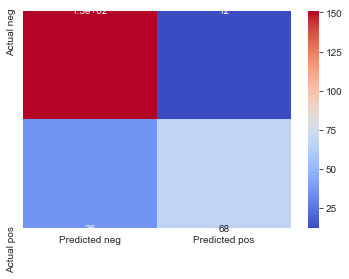

In [55]:
_=sns.heatmap(confusion_df, cmap='coolwarm', annot=True)

We can check precision,recall,f1-score using classification report!

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



lets find the accuracy after finding the optimal threshold

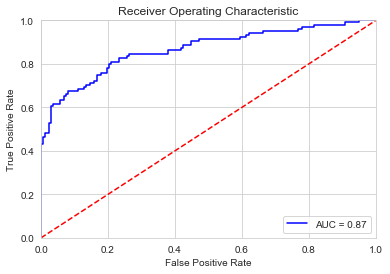

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score
import sklearn.metrics as metrics
metrics.roc_curve(y_test,logmodel.predict_proba(x_test)[:,1])
fpr,tpr,thresholds=metrics.roc_curve(y_test,logmodel.predict_proba(x_test)[:,1])
auc=roc_auc_score(y_test,logmodel.predict_proba(x_test)[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [58]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold


0.28226679224536716

In [59]:
probs = logmodel.predict_proba(x_test)[::,1]
new_predictions = np.where(probs>optimal_threshold, 1, 0)
accfin=accuracy_score(y_test, new_predictions).round(3)
accfin


0.794

In [60]:
from sklearn.metrics import log_loss
llfin=log_loss(y_test, new_predictions).round(3)
llfin

7.115

In [61]:
from sklearn.metrics import confusion_matrix
conmax1=confusion_matrix(y_test,new_predictions)
confusion_df1 = pd.DataFrame(conmax1, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
confusion_df1

,Predicted neg,Predicted pos
Actual neg,129,34
Actual pos,21,83


## 3.2) logistic regression using skitlearn and grid search cv
Grid searchscv can be used in the logtistic regression as it will penalize the model and give most model after going though different sets of data. it can penalize the model using l1( lasso) or l2 (ridge) over different c values. similar to linear regression where lambda was the parameter to penalize using lasso or ridge here 1/c = lambda. for higher values of c we get lower value of lambda.

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.random.uniform(0,120,4), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_.round(3))

tuned hpyerparameters :(best parameters)  {'C': 42.79465477612055, 'penalty': 'l1'}
accuracy : 0.796


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [63]:
predictionscv = logreg_cv.predict(x_test)
predictionscv

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [64]:
from sklearn.metrics import log_loss
log_loss(y_test, predictionscv).round(3)

6.08

In [65]:
from sklearn.metrics import accuracy_score
accuracycv=accuracy_score(y_test,predictionscv)
accuracycv.round(3)

0.824

In [66]:
from sklearn.metrics import confusion_matrix
conmaxcv=confusion_matrix(y_test,predictionscv)
confusion_dfcv = pd.DataFrame(conmaxcv, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
confusion_dfcv

,Predicted neg,Predicted pos
Actual neg,149,14
Actual pos,33,71


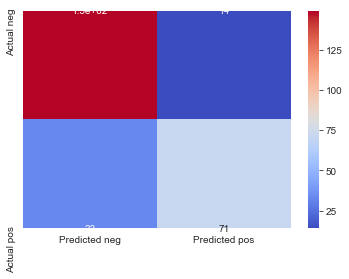

In [67]:
_=sns.heatmap(confusion_dfcv, cmap='coolwarm', annot=True)

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictionscv))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267



lets find the accuracy after finding the optimal threshold

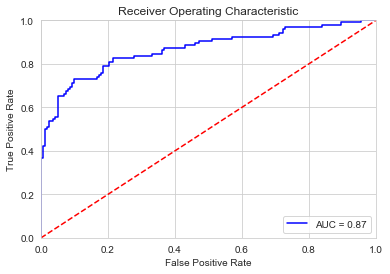

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score
import sklearn.metrics as metrics
metrics.roc_curve(y_test,logreg_cv.predict_proba(x_test)[:,1])
fprcv,tprcv,thresholdscv=metrics.roc_curve(y_test,logreg_cv.predict_proba(x_test)[:,1])
auccv=roc_auc_score(y_test,logreg_cv.predict_proba(x_test)[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fprcv, tprcv, 'b', label = 'AUC = %0.2f' % auccv)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [70]:
optimal_idxcv = np.argmax(tprcv - fprcv)
optimal_thresholdcv = thresholdscv[optimal_idxcv]
optimal_thresholdcv

0.4332043390932283

In [71]:
probscv = logreg_cv.predict_proba(x_test)[::,1]
new_predictionscv = np.where(probscv>optimal_thresholdcv, 1, 0)
acvfinal=accuracy_score(y_test, new_predictionscv).round(3)
acvfinal


0.831

In [73]:
from sklearn.metrics import log_loss
llcvfin=log_loss(y_test, new_predictionscv).round(3)
llcvfin

5.821

In [74]:
from sklearn.metrics import confusion_matrix
conmaxcv1=confusion_matrix(y_test,new_predictionscv)
confusion_dfcv1 = pd.DataFrame(conmaxcv1, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
confusion_dfcv1

,Predicted neg,Predicted pos
Actual neg,147,16
Actual pos,29,75


# 4) Best model

In [75]:
Best_Model =pd.DataFrame({'Model':['LOGISTIC','LOGISTIC_CV'],
             'ACCURACY':[accfin,acvfinal],
            'LOG LOSS':[llfin,llcvfin]})
             
Best_Model_df = Best_Model.sort_values(by='ACCURACY', ascending=False)
Best_Model_df = Best_Model_df.set_index('Model')
Best_Model_df

,ACCURACY,LOG LOSS
Model,,
LOGISTIC_CV,0.831,5.821
LOGISTIC,0.794,7.115


we can see that our logistic regression after gridsearch was better as it gave better accuracy and less log loss.